In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [27]:
data=pd.read_csv("Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
data.shape

(7043, 21)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
data=data.drop('customerID',axis=1)

In [31]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [32]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
data.dropna(inplace=True)

In [34]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

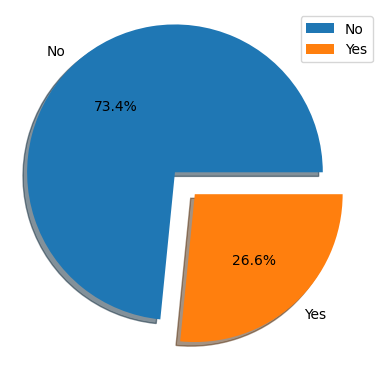

In [37]:
mylabels=["No","Yes"]
myexplode = [0.2, 0]
plt.pie(data['Churn'].value_counts(),labels = mylabels, explode = myexplode, shadow = True, autopct='%.1f%%')
plt.legend(mylabels)
plt.show()

In [38]:
#EDA

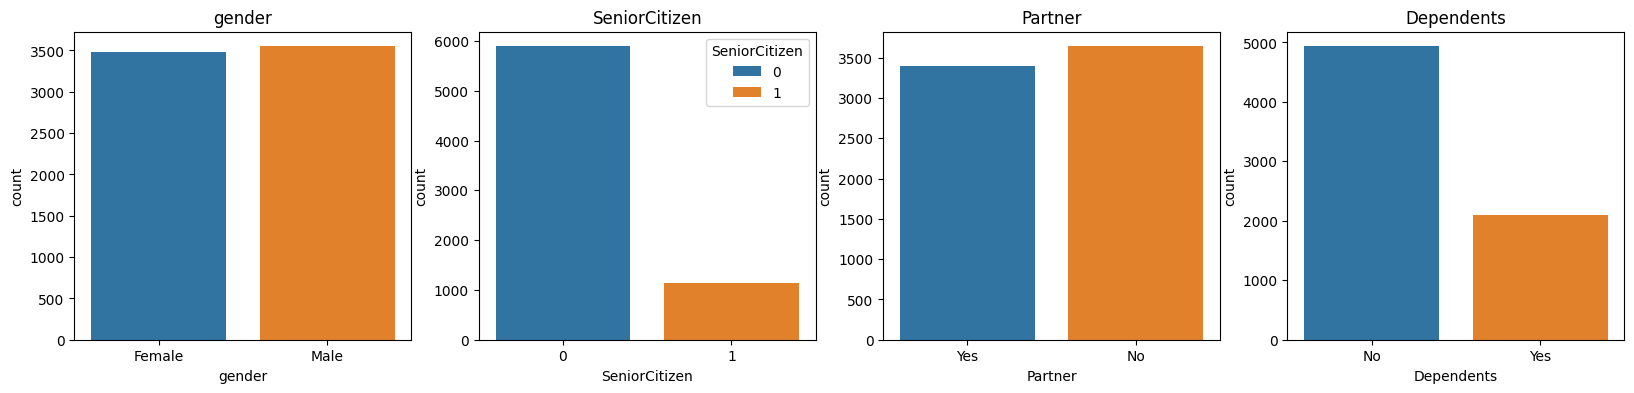

In [39]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]

plt.figure(figsize=(20,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x=str(col),hue = str(col), data=data)
    ax.set_title(f"{col}")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

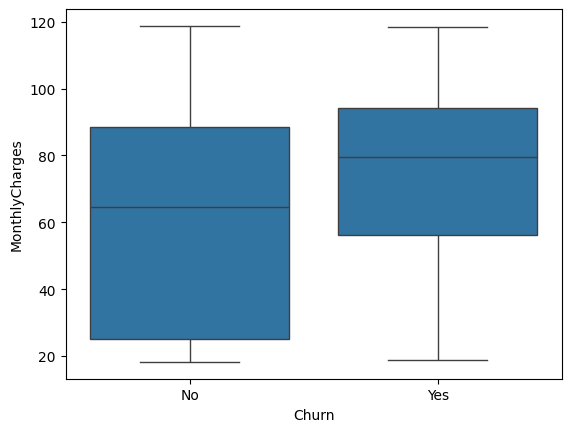

In [40]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)

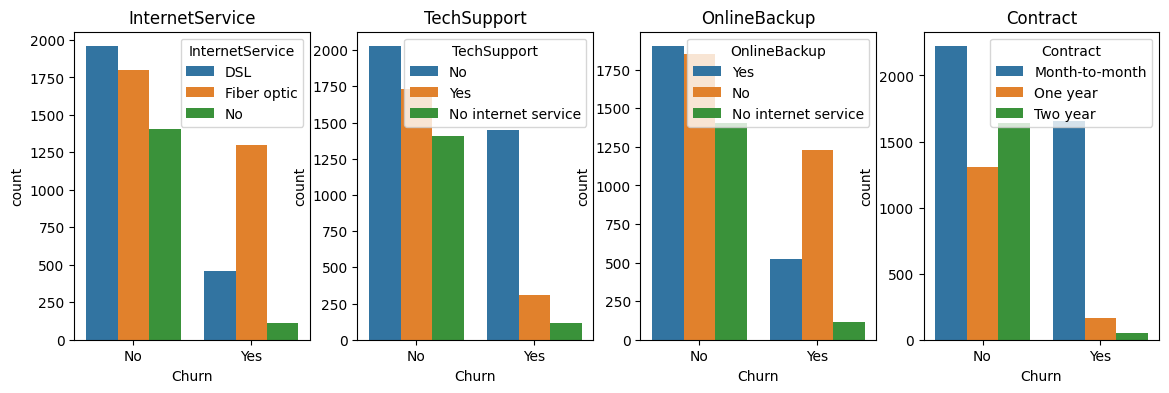

In [41]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

In [42]:
cat_features = data.drop(['TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [43]:
le = preprocessing.LabelEncoder()
label_encoded = cat_features.apply(le.fit_transform)
label_encoded.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [44]:
num_features = data[['TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
final=pd.merge(num_features,label_encoded,left_index=True,right_index=True)

In [45]:
final

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1889.50,56.95,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,108.15,53.85,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1840.75,42.30,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,151.65,70.70,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,0,24,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,7362.90,103.20,0,72,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,346.45,29.60,0,11,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,306.60,74.40,1,4,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [59]:
from sklearn.model_selection import train_test_split

X = final.drop(['Churn'],axis=1)
Y = final['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=41)
col=X.columns

In [60]:
# Standardization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [61]:
pd.DataFrame(X_train,columns=col)

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.013749,0.524378,0.0,0.014085,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.218948,0.768657,0.0,0.267606,0.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.000000
2,0.773263,0.736816,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.333333
3,0.008914,0.059701,0.0,0.042254,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
4,0.679016,0.701990,0.0,0.929577,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.087936,0.409950,0.0,0.183099,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
5621,0.106024,0.469652,0.0,0.183099,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.666667
5622,0.094525,0.579602,0.0,0.140845,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
5623,0.039384,0.660199,1.0,0.042254,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.666667


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# RandomForest
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, predict)
# Evaluate the performance
print(classification_report(Y_test, predict))
print(f"RandomForest Accuracy: {accuracy}")
print()
# Generate the confusion matrix
cm = confusion_matrix(Y_test, predict)
print("Confusion Matrix:")
print(pd.DataFrame(cm))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.64      0.47      0.54       384

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

RandomForest Accuracy: 0.7818052594171997

Confusion Matrix:
     0    1
0  920  103
1  204  180


In [63]:
# DecisionTree
model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=23, min_samples_leaf=5)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, predict)
# Evaluate the performance
print(classification_report(Y_test, predict))
print(f"DecisionTree Accuracy: {accuracy}")
print()
# Generate the confusion matrix
cm = confusion_matrix(Y_test, predict)
print("Confusion Matrix:")
print(pd.DataFrame(cm))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1023
           1       0.49      0.42      0.45       384

    accuracy                           0.72      1407
   macro avg       0.64      0.63      0.63      1407
weighted avg       0.71      0.72      0.72      1407

DecisionTree Accuracy: 0.7235252309879175

Confusion Matrix:
     0    1
0  858  165
1  224  160


In [70]:
# SVM
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, predict)
# Evaluate the performance
print(classification_report(Y_test, predict))
print(f"SVM Accuracy: {accuracy}")
print()
# Generate the confusion matrix
cm = confusion_matrix(Y_test, predict)
print("Confusion Matrix:")
print(pd.DataFrame(cm))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           1       0.64      0.52      0.57       384

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

SVM Accuracy: 0.7903340440653873

Confusion Matrix:
     0    1
0  913  110
1  185  199


In [65]:
# Logistic
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, predict)
# Evaluate the performance
print(classification_report(Y_test, predict))
print(f"Logistic Accuracy: {accuracy}")
print()
# Generate the confusion matrix
cm = confusion_matrix(Y_test, predict)
print("Confusion Matrix:")
print(pd.DataFrame(cm))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           1       0.64      0.52      0.57       384

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Logistic Accuracy: 0.7903340440653873

Confusion Matrix:
     0    1
0  913  110
1  185  199


In [66]:
X= pd.DataFrame(X_test[0:10],columns=col)
Y= pd.DataFrame(Y_test[0:10])

In [67]:
X

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.200052,0.831343,1.0,0.225352,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667
1,0.127804,0.127363,0.0,0.492958,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
2,0.481889,0.535821,0.0,0.816901,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000
3,0.908880,0.945274,0.0,0.957746,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.333333
4,0.155262,0.882090,1.0,0.169014,1.0,0.0,0.0,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667
5,0.939915,0.946766,0.0,1.000000,1.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
6,0.003548,0.311443,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
7,0.071452,0.008955,0.0,0.478873,1.0,0.0,0.0,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.000000
8,0.076460,0.262189,0.0,0.225352,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.000000
9,0.853306,0.853731,1.0,0.985915,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000


In [68]:
Y

,Churn
3254,0
116,0
1925,0
15,0
261,1
2537,0
3631,1
4119,0
351,0
1187,0


In [69]:
model = LogisticRegression(random_state=42)
model.fit(X, Y)
predict = model.predict(X)
actual=pd.DataFrame(Y)
actual = actual.reset_index(drop=True)
predicted=pd.DataFrame(predict,columns=["Predicted"])
predicted = predicted.reset_index(drop=True)
pd.concat([actual, predicted], axis=1)

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Churn,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [74]:
comp=pd.DataFrame({"Model":["Random Forest","Decision Tree","SVC","Logistic"],"Score in %":[78.18,72.35,79.03,79.03]})

In [75]:
comp

,Model,Score in %
0,Random Forest,78.18
1,Decision Tree,72.35
2,SVC,79.03
3,Logistic,79.03
